In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [8]:
df = pd.read_csv("../data/landslideCleaned.csv")
top_countries = df['country_name'].value_counts().head(10)


C:\Users\deshr\AppData\Local\Temp\ipykernel_33768\1783147995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


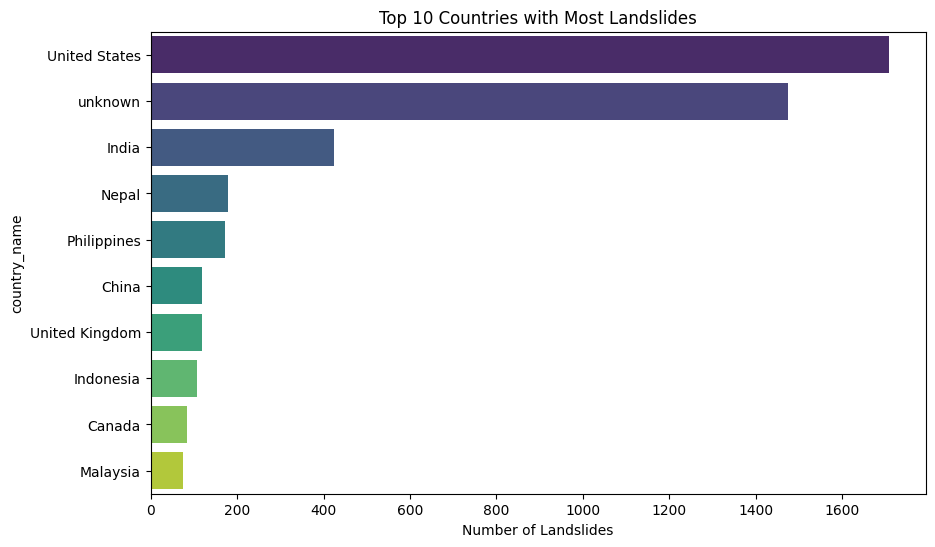

In [9]:

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Landslides')
plt.xlabel('Number of Landslides')
plt.show()


In [10]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=2)
for _, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=3, color='red', fill=True).add_to(map)
map.save("landslides_map.html")

map

In [14]:
df = df[df['landslide_trigger'] != 'unknown']
df = df[df['landslide_size'] != 'unknown']

trigger_stats = df.groupby('landslide_trigger')[['fatality_count', 'injury_count']].mean().reset_index()

trigger_melted = trigger_stats.melt(id_vars='landslide_trigger', 
                                    value_vars=['fatality_count', 'injury_count'],
                                    var_name='Impact Type', value_name='Average Count')

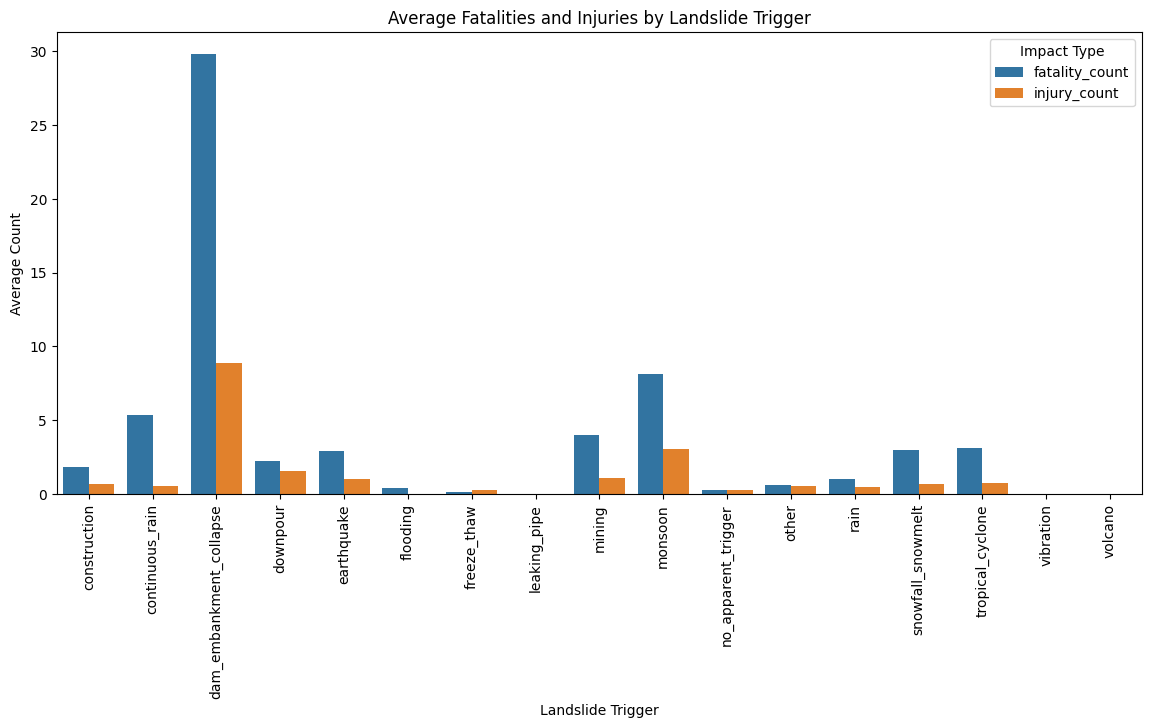

In [18]:
plt.figure(figsize=(14, 6))
sns.barplot(data=trigger_melted, x='landslide_trigger', y='Average Count', hue='Impact Type')
plt.title('Average Fatalities and Injuries by Landslide Trigger')
plt.xlabel('Landslide Trigger')
plt.ylabel('Average Count')
plt.xticks(rotation=90)
plt.show()